In [10]:
import utils
import skimage
import skimage.morphology
import numpy as np

import matplotlib.pyplot as plt

In [11]:
def extract_boundary(im: np.ndarray) -> np.ndarray:
    """
    A function that extracts the inner boundary from a boolean image.

    Args:
        im: np.ndarray of shape (H, W) with boolean values (dtype=bool)
    
    Returns:
        np.ndarray of shape (H, W), dtype=bool
    """
    # Define the 3x3 structuring element for erosion
    structuring_element = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ], dtype=bool)

    # Perform erosion on the binary image
    erosion_image = skimage.morphology.binary_erosion(im, structuring_element)
    
    # Extract the boundary using XOR (original - eroded image)
    boundary = np.logical_xor(im, erosion_image)
    
    return boundary


Reading image: images\blood-vessels.png
Saving image to: image_processed\blood-vessels-boundary.png


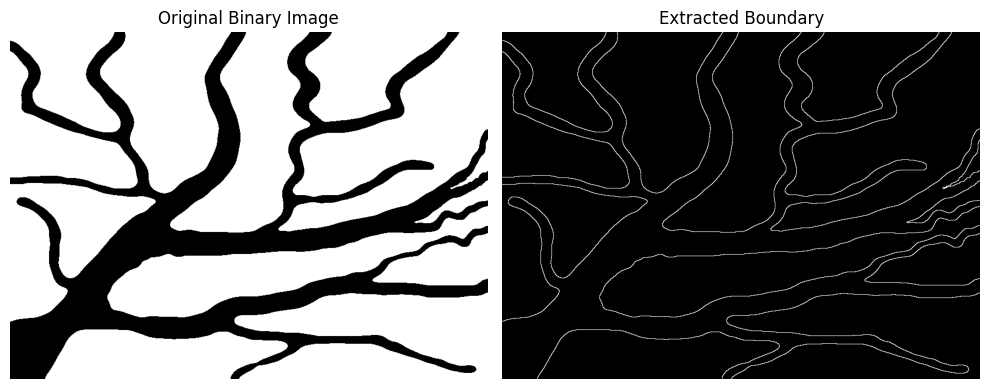

In [12]:
if __name__ == "__main__":
    im = utils.read_image("blood-vessels.png")
    binary_image = (im != 0)  # Convert to binary
    boundary = extract_boundary(binary_image)

    # Assertions to check correctness
    assert im.shape == boundary.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, boundary.shape)
    assert boundary.dtype == bool, "Expected resulting image dtype to be bool. Was: {}".format(
            boundary.dtype)

    # Save the boundary image
    boundary = utils.to_uint8(boundary)
    utils.save_im("blood-vessels-boundary.png", boundary)

    # Display original binary image and boundary-extracted image
    plt.figure(figsize=(10, 5))
    
    # Original Binary Image
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap="gray")
    plt.title("Original Binary Image")
    plt.axis("off")
    
    # Boundary Image
    plt.subplot(1, 2, 2)
    plt.imshow(boundary, cmap="gray")
    plt.title("Extracted Boundary")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
